#### 鸢尾花随机森林分类模型

In [3]:
# Classification- Lime
import lime
import lime.lime_tabular
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
 
# Load the dataset and train a classifier
data = datasets.load_iris()
classifier = RandomForestClassifier()
classifier.fit(data.data, data.target)
 
# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    data.data, 
    mode="classification", 
    training_labels=data.target, 
    feature_names=data.feature_names, 
    class_names=data.target_names, 
    discretize_continuous=True)
 
# Select an instance to be explained (you can choose any index)
instance = data.data[0]
 
# Generate an explanation for the instance
explanation = explainer.explain_instance(instance, classifier.predict_proba, num_features=10)
 
# Display the explanation
explanation.show_in_notebook()

In [ ]:
# 导入LIME库和它的tabular模型解释器，用于处理表格数据
import lime
import lime.lime_tabular
# 导入sklearn库，用于加载示例数据集和构建随机森林分类器
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

# 加载iris数据集并训练一个随机森林分类器
data = datasets.load_iris()  # 加载iris数据集
classifier = RandomForestClassifier()  # 创建随机森林分类器的实例
classifier.fit(data.data, data.target)  # 使用iris数据集的特征和目标来训练分类器

# 创建一个LIME解释器对象，专门用于解释表格数据（如CSV或数据库中的数据）
explainer = lime.lime_tabular.LimeTabularExplainer(
    data.data,  # 训练数据集的特征
    mode="classification",  # 指定解释器用于分类任务
    training_labels=data.target,  # 训练数据集的目标（标签）
    feature_names=data.feature_names,  # 特征名称，用于更好地解释和可视化
    class_names=data.target_names,  # 类别名称，用于解释和可视化
    discretize_continuous=True  # 指示连续特征是否应该被离散化处理，以简化解释
)

# 选择一个实例来解释。这里选择了数据集中的第一个实例
instance = data.data[0]

# 生成对该实例的解释。这里使用随机森林分类器的predict_proba方法来预测概率，
# 并指定解释中包含的最重要特征数量为10
explanation = explainer.explain_instance(
    instance,  # 要解释的实例
    classifier.predict_proba,  # 分类器的预测概率函数
    num_features=10  # 在解释中考虑的特征数量
)

# 在Jupyter Notebook中显示解释。这将以图形方式展示影响分类决策的主要因素
explanation.show_in_notebook()

#### 糖尿病随机森林分类模型

In [5]:
pwd

'/home/md04/public/jupyter/xyt/模型解释'

In [8]:
# 导入必要的库 
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.ensemble import RandomForestClassifier 
# classification_report是sklearn.metrics模块下的一个函数，用于显示主要分类指标的文本报告
from sklearn.metrics import classification_report 

# 读取数据集
df = pd.read_csv("./data/diabetes.csv") 
 
# 分离特征和目标变量 
X = df.drop(columns='Outcome') 
y = df['Outcome'] 
 
# 创建训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(
              X, y,test_size=0.3, # 测试集占30%  
              stratify =y,  # 按目标变量的比例进行分层抽样
              random_state = 13)  # 随机种子确保结果可复现 
 
# 构建随机森林模型 
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100, bootstrap = True) 
rf_clf.fit(X_train, y_train) # 训练模型

# 在测试集上进行预测
y_pred = rf_clf.predict(X_test) 
 
# 输出分类报告
print(classification_report(y_test, y_pred)) # 注意参数顺序，先是实际值后是预测值 

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



#### LIME模型解释

In [10]:
# 从lime库中导入LimeTabularExplainer模块，它用于解释表格数据（如CSV文件或数据库表）中模型的预测
from lime.lime_tabular import LimeTabularExplainer 
 
# 定义分类结果的类名，用于解释的输出，这里分别代表患有糖尿病和没有糖尿病的情况
class_names = ['Has diabetes', 'No diabetes'] 
class_names = Y_train. 
# 从训练数据中获取特征名，这将用于解释中，以便知道每个特征是什么 
feature_names = list(X_train.columns) 
 
# 使用LimeTabularExplainer创建一个解释器实例，该实例将被用来解释模型的预测
# - X_train.values：训练数据的值，转换为numpy数组格式
# - feature_names：数据集中每个特征的名称
# - class_names：可能的分类结果的名称
# - mode：指定解释模式，这里是'classification'，因为我们是在进行分类任务
explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names,  
                                 class_names = class_names, mode = 'classification')

# 使用解释器解释测试数据集中第8个实例的预测结果
# rf_clf.predict_proba是随机森林模型的方法，用于预测每个类别的概率
# X_test.iloc[8]选择测试集中的第8个实例，.iloc是基于位置的索引
explanation = explainer.explain_instance(X_test.iloc[8], rf_clf.predict_proba) 
 
# 显示模型预测的解释结果
# - show_table=True：显示一个表格，列出对模型预测影响最大的特征
# - show_all=False：仅显示对结果影响最大的几个特征，而不是所有特征
explanation.show_in_notebook(show_table = True, show_all = False)

/home/md04/anaconda3/envs/fbw/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### SHAP模型解释

Variable Importance Plot - Global Interpretation


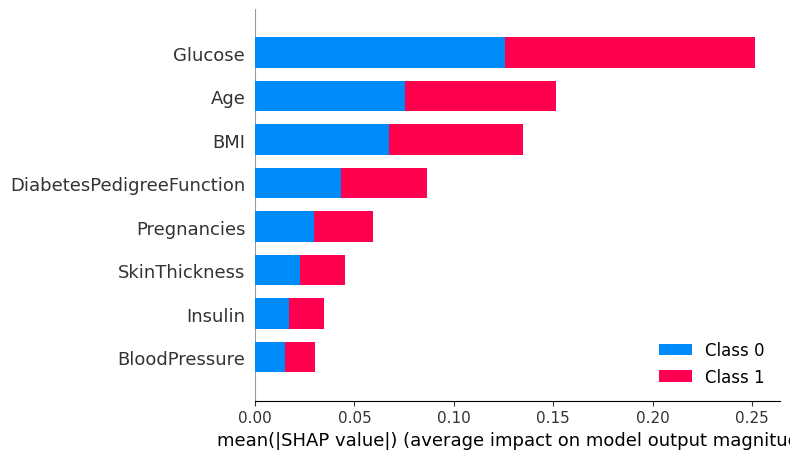

In [13]:
# 导入SHAP库 
import shap 
# 导入matplotlib库中的pyplot模块进行绘图
import matplotlib.pyplot as plt
 
# 初始化SHAP的JS可视化代码到Jupyter Notebook中
shap.initjs() 

# 从shap库中导入TreeExplainer类
from shap import TreeExplainer

# 创建解释器对象
explainer = TreeExplainer(rf_clf) 
 
"""
计算X_test的shap值，而不是单一行，
以便为绘图提供更多数据。
""" 
shap_values = explainer.shap_values(X_test) 

# 打印变量重要性图 - 全局解释
print("Variable Importance Plot - Global Interpretation") 
figure = plt.figure() 
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

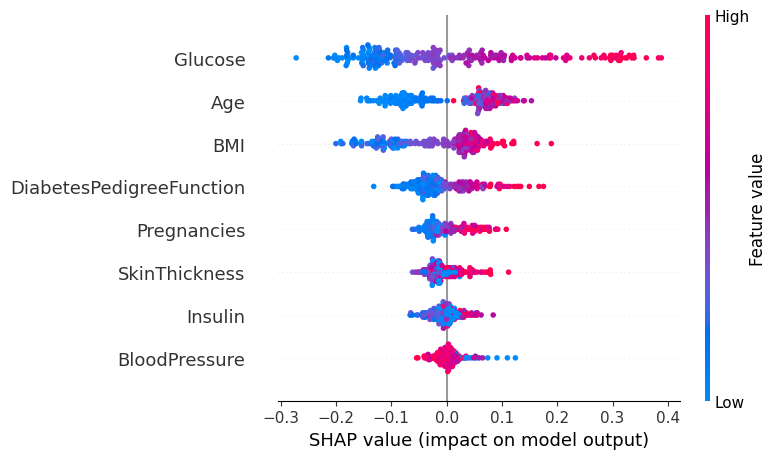

In [15]:
# 特定分类结果的汇总图 
# Summary Plot Deep-Dive on Label 1 
shap.summary_plot(shap_values[1], X_test)

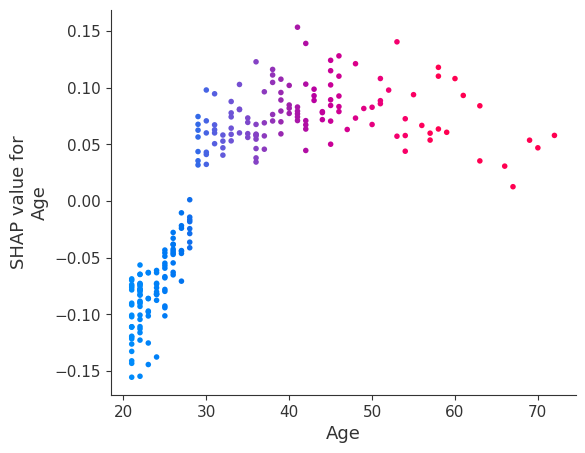

In [16]:
# 相关图（依赖图）
# Dependence Plot on Age feature 
shap.dependence_plot('Age', shap_values[1], X_test, interaction_index="Age")

In [17]:
# 创建一个TreeExplainer对象，用于解释基于树的模型，如随机森林
# 这里，我们用训练好的随机森林分类器rf_clf初始化这个解释器
explainer = shap.TreeExplainer(rf_clf)

# 计算测试集中第一个实例的SHAP值。这些值解释了每个特征对于模型预测的贡献
# X_test.iloc[0, :]选取测试数据集中的第一行（即第一个实例）
shap_value_single = explainer.shap_values(X = X_test.iloc[0,:])

# 使用force_plot创建一个力量图（force plot），这是一种展示单个预测的解释的可视化形式
# - base_value是模型输出的基准值，即没有任何特征时模型的预期输出。这里使用explainer.expected_value[1]，
#   它代表了对应于目标类别（通常是正类）的基准值
# - shap_values是计算得到的SHAP值，这里使用shap_value_single[1]指的是对应正类的SHAP值
# - features是该实例的特征值，这里使用X_test.iloc[0,:]
shap.force_plot(base_value = explainer.expected_value[1], shap_values = shap_value_single[1], features = X_test.iloc[0,:])

#### Yellowbrick

In [ ]:
#pip install yellowbrick

#### ELI5

In [19]:
pip install eli5

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement eli5 (from versions: none)
ERROR: No matching distribution found for eli5
Note: you may need to restart the kernel to use updated packages.


In [18]:
# 导入所需的库
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 使用seaborn库加载mpg数据集，并且去掉包含缺失值的行
mpg = sns.load_dataset('mpg').dropna()

# 去掉'name'列，因为我们不需要它来预测'origin'
mpg.drop('name', axis =1 , inplace = True)

# 数据分割：将数据分为特征集X和目标变量y，然后进一步分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(mpg.drop('origin', axis = 1), mpg['origin'], test_size = 0.2, random_state = 121)

# 模型训练：创建随机森林分类器实例，并用训练集数据训练它
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

NameError: name 'sns' is not defined

In [ ]:
import eli5
eli5.show_weights(clf, feature_names = list(X_test.columns))

In [ ]:
eli5.show_prediction(clf, X_train.iloc[0])

In [ ]:
#Permutation Importance
perm = PermutationImportance(clf, scoring = 'accuracy',random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))